In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom

data = pd.read_csv('user_behavior_dataset.csv')
data.head()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [5]:
X = data.iloc[:, [3, 4]].values  

som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)

som.train_random(data=X, num_iteration=100)


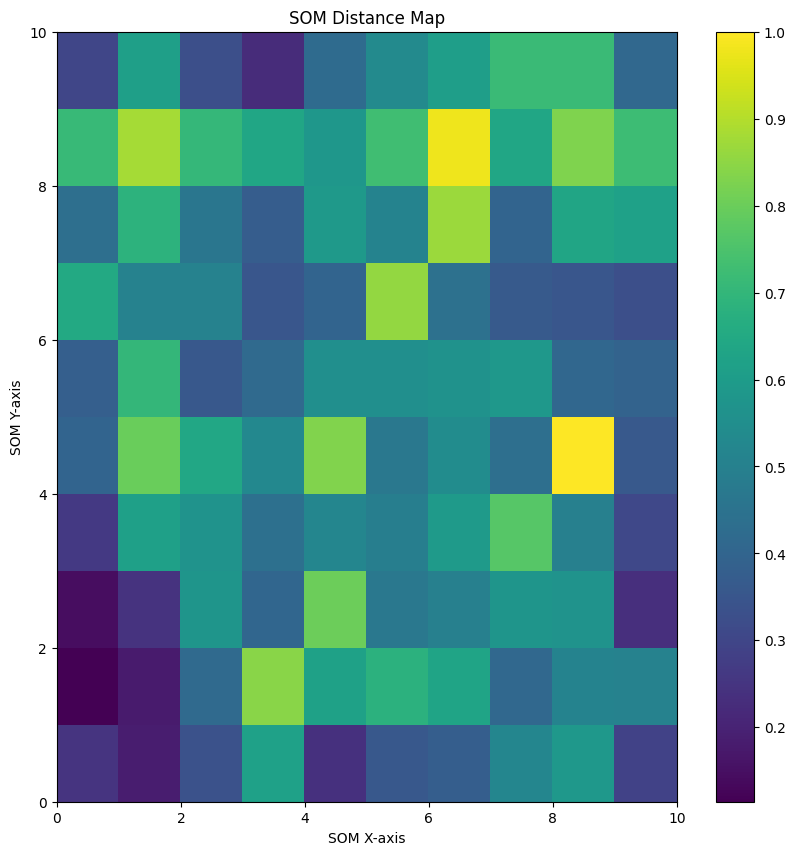

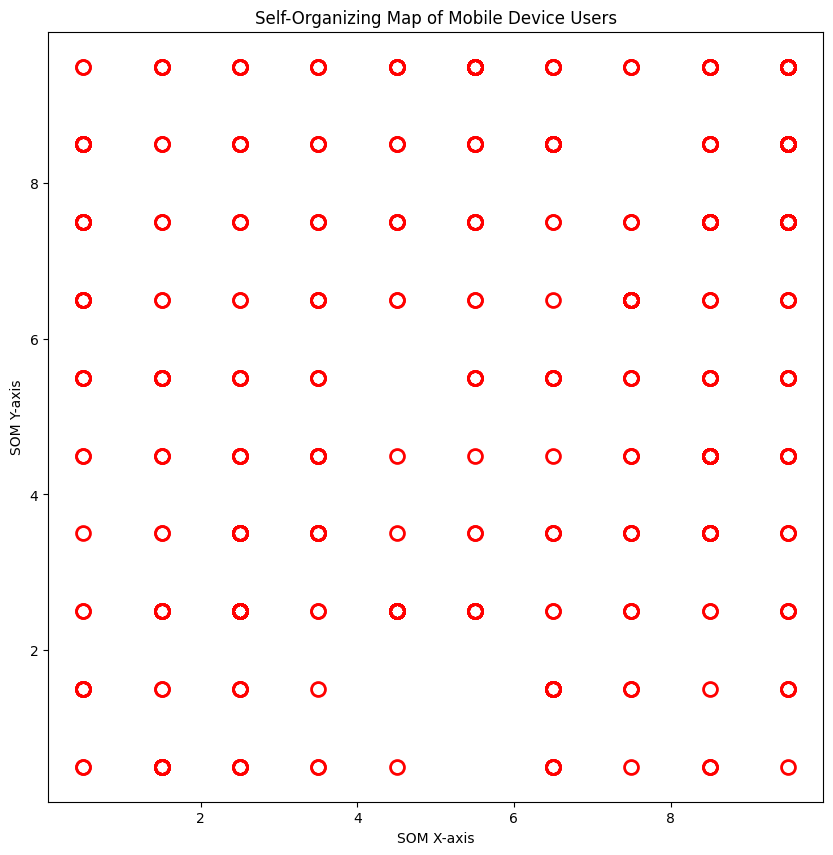

In [6]:
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T)  
plt.colorbar()
plt.title('SOM Distance Map')
plt.xlabel('SOM X-axis')
plt.ylabel('SOM Y-axis')
plt.show()

markers = ['o', 's']
colors = ['r', 'g']

plt.figure(figsize=(10, 10))
for i, x in enumerate(X):
    w = som.winner(x)  
    gender = data.iloc[i, 1]  
    marker = markers[int(gender == 'Male')]
    color = colors[int(gender == 'Male')]
    
    plt.plot(w[0] + 0.5, w[1] + 0.5, marker, markeredgecolor=color, 
             markerfacecolor='None', markersize=10, markeredgewidth=2)

plt.title('Self-Organizing Map of Mobile Device Users')
plt.xlabel('SOM X-axis')
plt.ylabel('SOM Y-axis')
plt.show()
